In [1]:
### IMPORT LIBRARIES ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## import the dataset

In [2]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## drop two columns "Functioning Day" and "Dew point temperature°C"

In [3]:
data = data.drop(columns=['Functioning Day', 'Dew point temperature(°C)'])
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


## converting the 'Date' column to 'datetime'

In [4]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
dtypes: datetime64[ns](1), float64(5), 

## feature engineering: Divide the date into 'weekday' and 'weekend'
## Also, we then drop the original 'Date' column

In [5]:
data['DayType'] = data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
data.drop(columns=['Date'], inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  DayType                  8760 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 821.4+ KB


## One-hot encoding for categorical features

In [7]:
data = pd.get_dummies(data, columns=['DayType','Holiday', 'Seasons'], drop_first=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayType_Weekend,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,True,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,False,True,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,True,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,True,False,False,True


## Train and test split

In [8]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 13), (1752, 13), (7008,), (1752,))

## Apply scaling and checking the dataframe shapes

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((7008, 13), (1752, 13))

# LINEAR REGRESSION MODEL

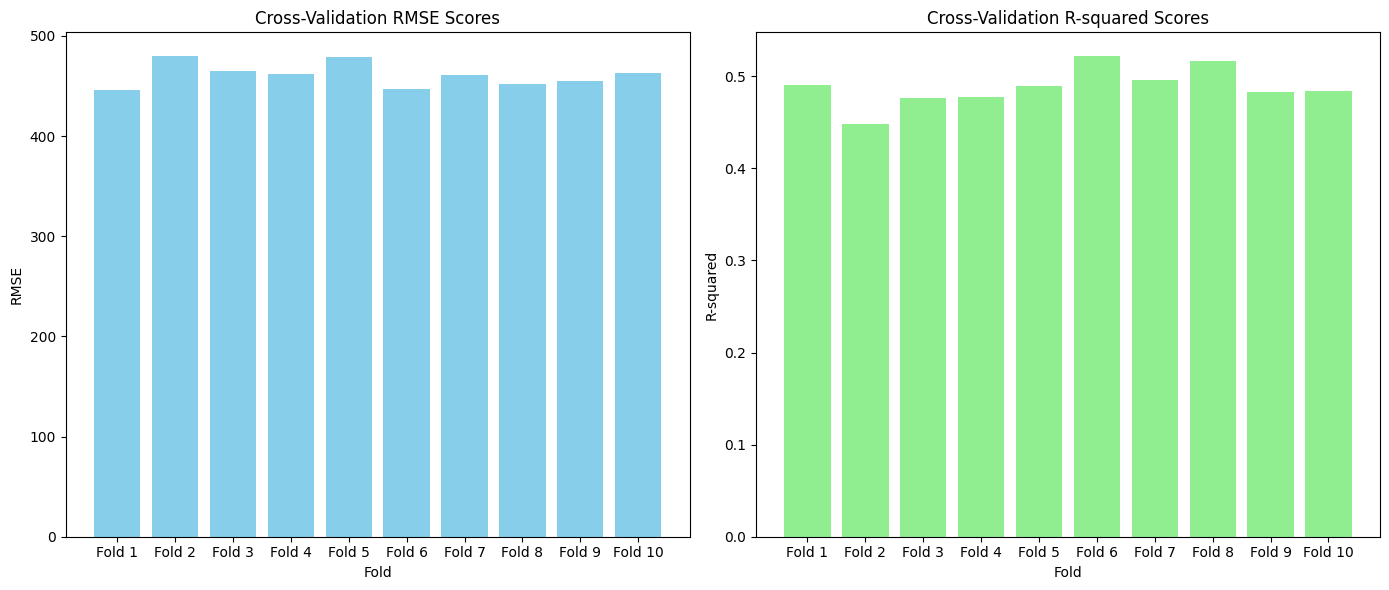

Mean CV RMSE: 460.8359657547283
Mean CV R-squared: 0.48835731580797936


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Linear Regression model
regressor = LinearRegression()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE on scaled data
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared on scaled data
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# Print mean scores
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Mean CV R-squared:", cv_r2_scores.mean())


# RANDOM FOREST MODEL

Cross-validation RMSE scores: [255.01985919 266.48424064 256.80041849 260.06447546 300.70454244
 228.82727761 253.17185197 239.97183992 244.82357397 316.57726829]
Mean CV RMSE: 262.2445347963254
Cross-validation R-squared scores: [0.8333345  0.82965966 0.83989874 0.83436018 0.7989646  0.87438787
 0.84813376 0.86341563 0.85027567 0.75908665]
Mean CV R-squared: 0.8331517265238944


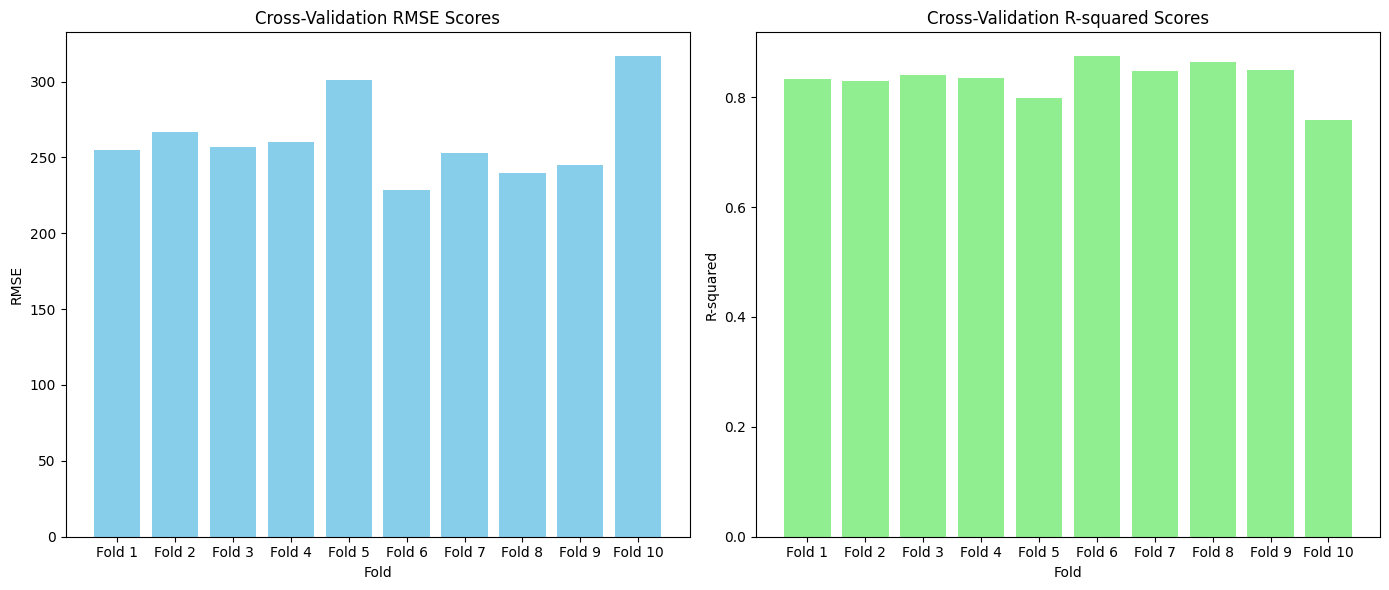

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# SUPPORT VECTOR MACHINE MODEL

Cross-validation RMSE scores: [527.22599081 555.09252423 552.8690972  539.76721848 586.58975725
 543.02916414 553.17269505 543.27040139 534.13341659 546.90042813]
Mean CV RMSE: 548.2050693266225
Cross-validation R-squared scores: [0.28765344 0.26089658 0.2579248  0.28646433 0.23499986 0.2926045
 0.27497686 0.29997664 0.28733503 0.28101813]
Mean CV R-squared: 0.27638501751149175


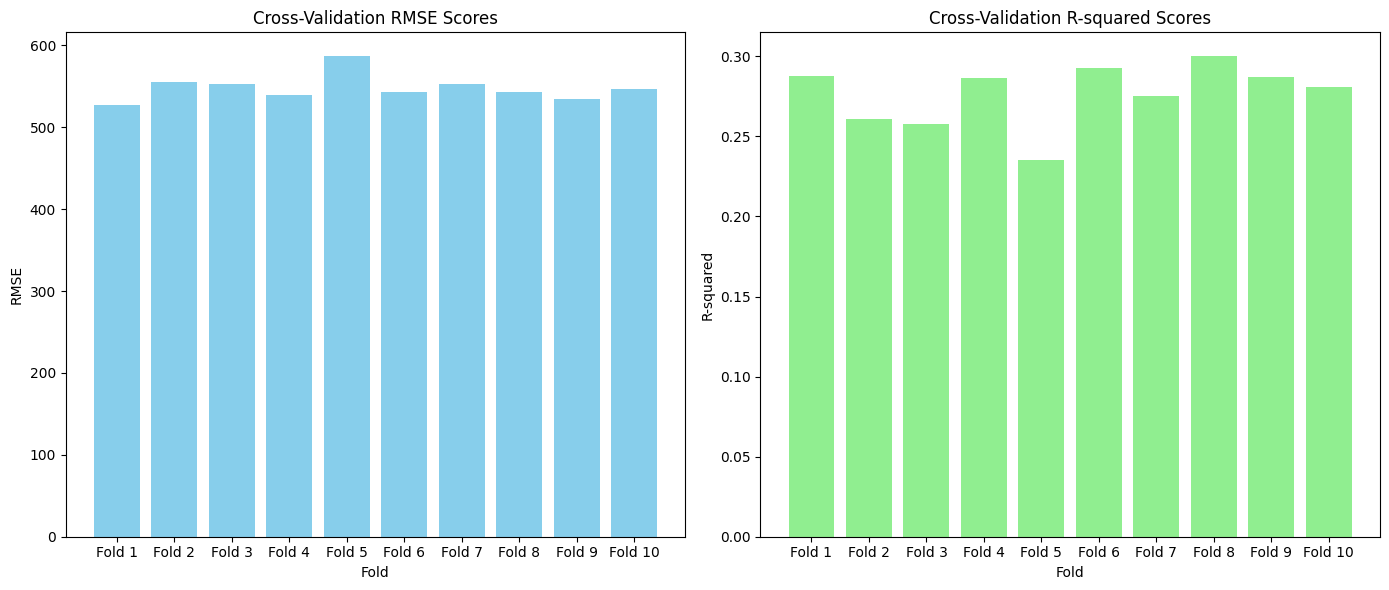

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an SVM regressor
regressor = SVR()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# XGBOOST MODEL

Cross-validation RMSE scores: [252.56576345 272.54224263 259.17942558 259.06123671 309.73552947
 236.26383622 266.91235981 260.70269552 241.68357728 318.06770989]
Mean CV RMSE: 267.6714376574205
Cross-validation R-squared scores: [0.83652676 0.82182691 0.83691864 0.83563568 0.78670798 0.86609078
 0.83120182 0.83879761 0.85409163 0.75681288]
Mean CV R-squared: 0.8264610679252851


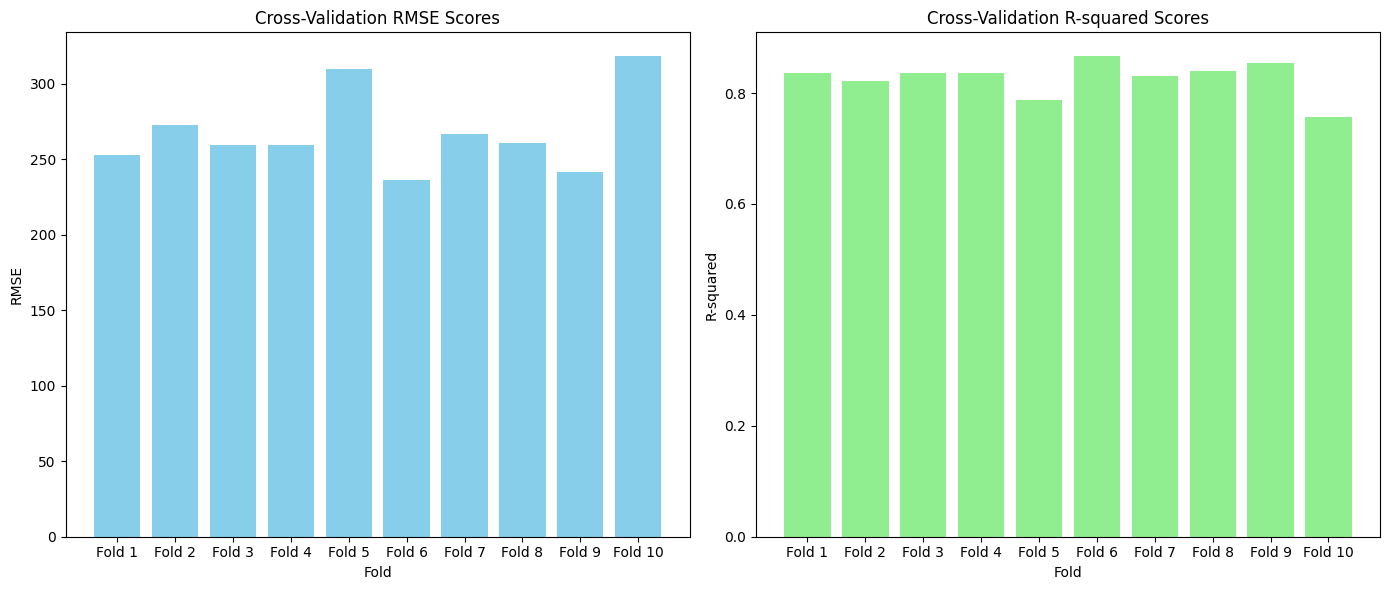

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an XGBoost regressor
regressor = xgb.XGBRegressor(eval_metric='mlogloss', random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# LIGHT GBM MODEL

Cross-validation RMSE scores: [251.94233249 259.73111355 251.3533912  261.21544825 290.80084627
 230.50387269 251.54206792 237.19677777 238.66247817 318.84774853]
Mean CV RMSE: 259.1796076843463
Cross-validation R-squared scores: [0.8373328  0.83818365 0.84661857 0.83289079 0.81198872 0.87254043
 0.85008273 0.86655632 0.85771661 0.75561862]
Mean CV R-squared: 0.8369529237057609


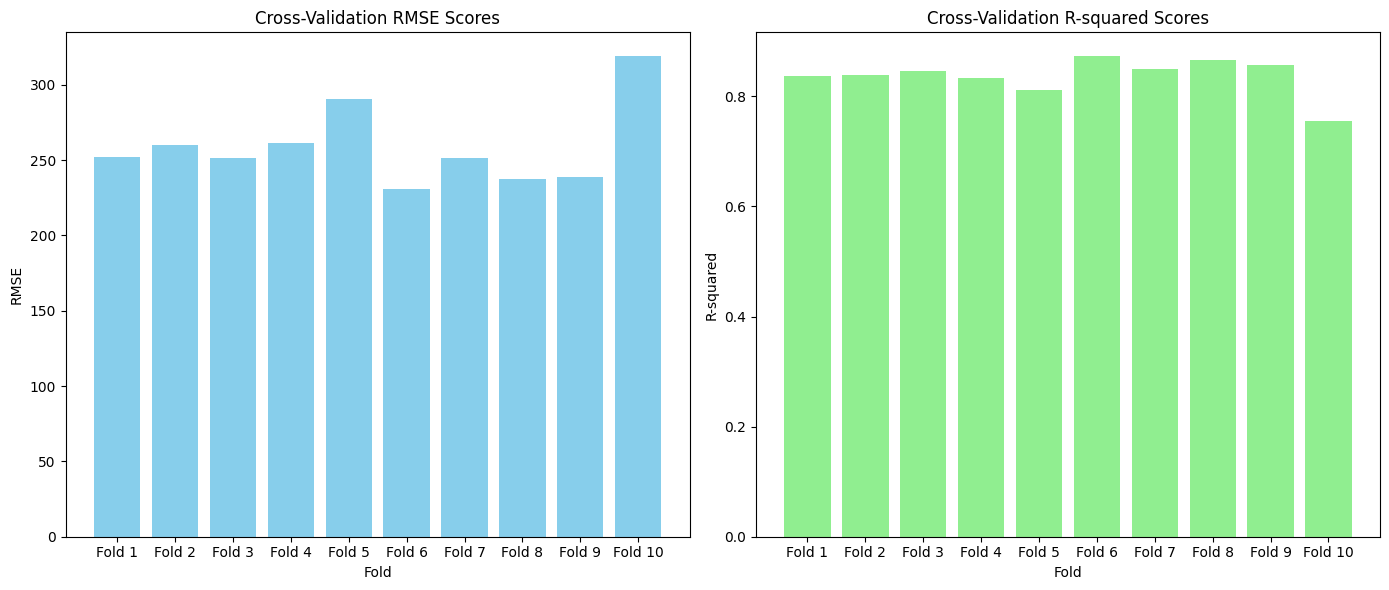

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a LightGBM regressor
regressor = lgb.LGBMRegressor(random_state=42, verbose=0)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

Cross-validation RMSE scores: [251.94233249 259.73111355 251.3533912  261.21544825 290.80084627
 230.50387269 251.54206792 237.19677777 238.66247817 318.84774853]
Mean CV RMSE: 259.1796076843463
Cross-validation R-squared scores: [0.8373328  0.83818365 0.84661857 0.83289079 0.81198872 0.87254043
 0.85008273 0.86655632 0.85771661 0.75561862]
Mean CV R-squared: 0.8369529237057609


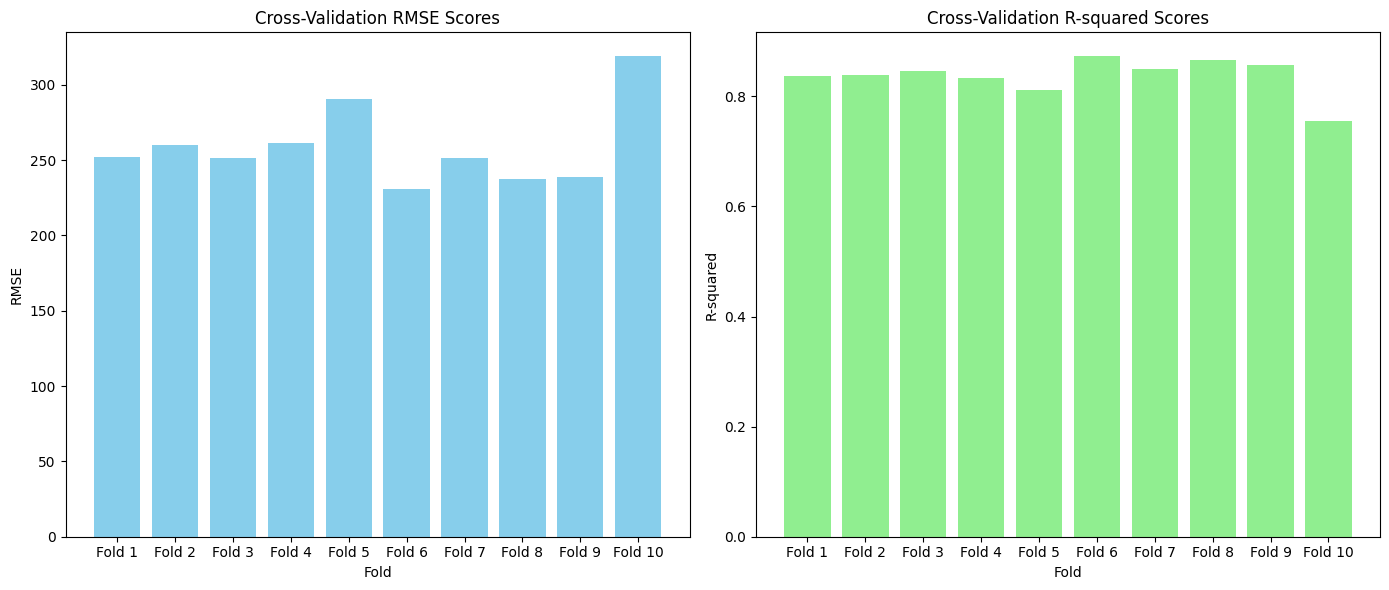

Model saved to: /Users/secret/Desktop/Seoul_bike/MLRegression_SeoulBikeRental/phase_two/lightgbm_model.joblib


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import joblib
import os

# Initialize a LightGBM regressor
regressor = lgb.LGBMRegressor(random_state=42, verbose=0)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# Fit the model on the entire training set
regressor.fit(X_train_scaled, y_train)

# Save the model
notebook_directory = os.getcwd()
model_filename = 'lightgbm_model.joblib'
model_path = os.path.join(notebook_directory, model_filename)

joblib.dump(regressor, model_path)

print(f"Model saved to: {model_path}")

# To load the model later, you can use:
# loaded_model = joblib.load(model_path)

# GridSearch

In [28]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Print results
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=10, max_featu

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
139 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-p

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE score found: 273.75106484123796


Test RMSE: 270.5773799927207
Test R-squared: 0.8242823000961361


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


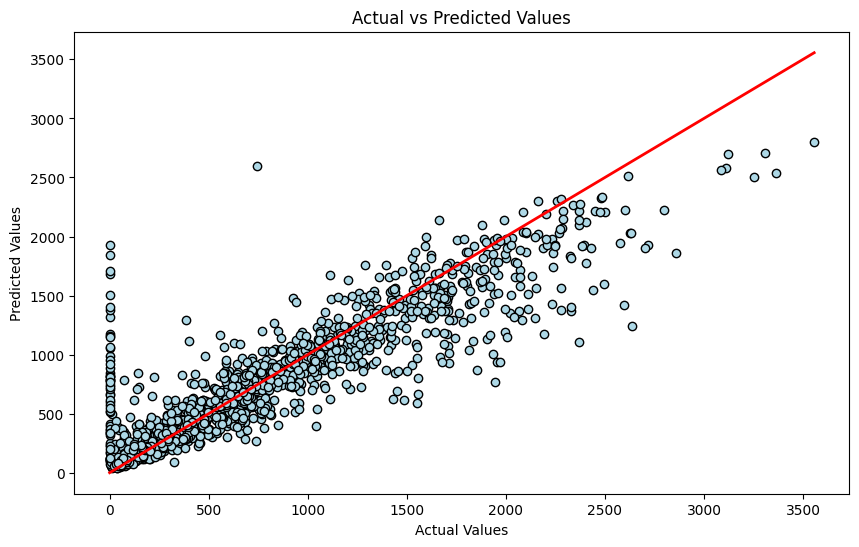

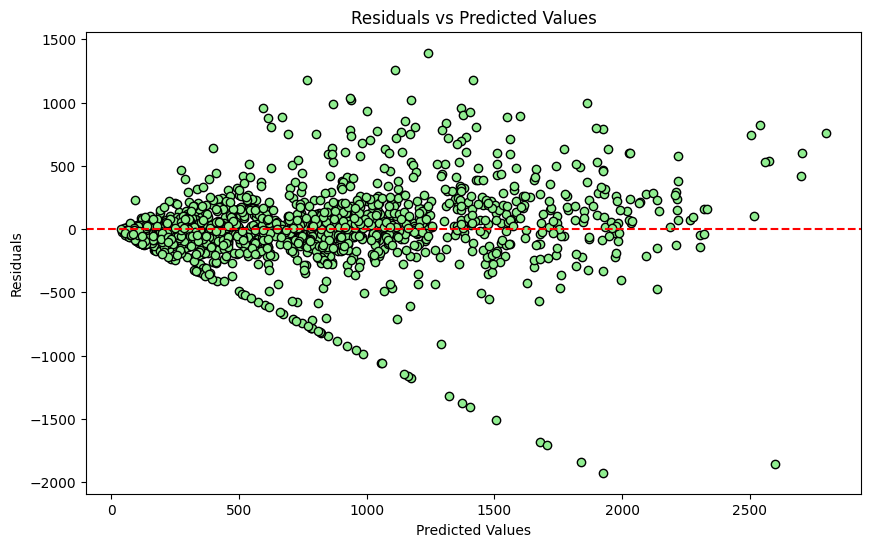

In [29]:
# Fit the best model on the entire training data
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_regressor.predict(X_test_scaled)

# Evaluate the model on the test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
test_r2 = r2_score(y_test, y_pred)  # R-squared

print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='lightblue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='lightgreen', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# Feature Importance Measures

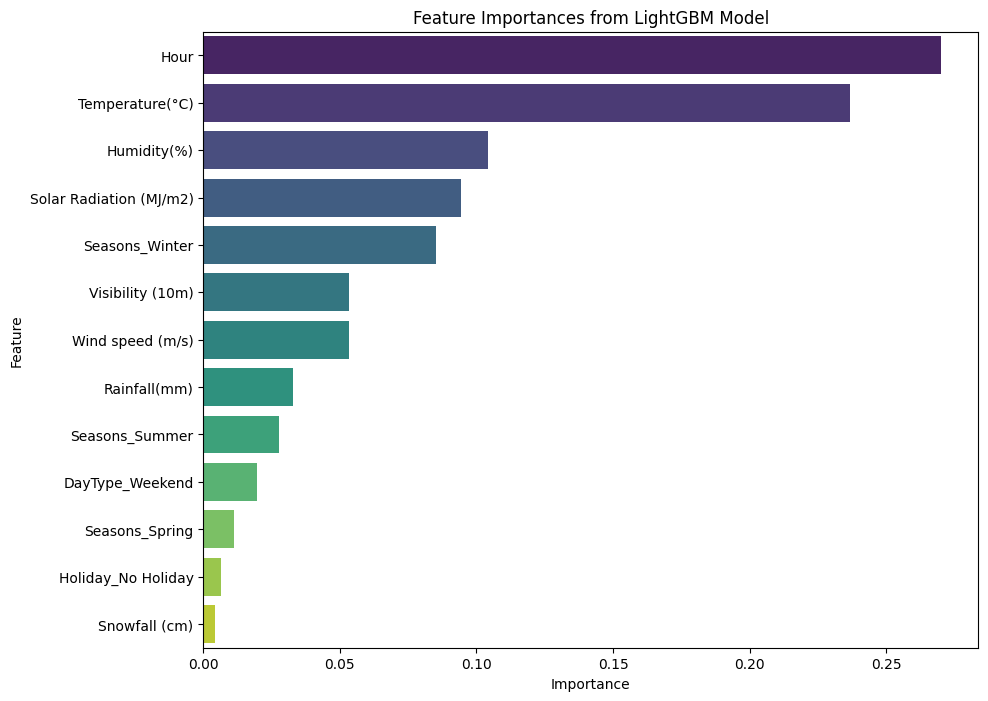

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_regressor' is the best model from GridSearchCV
# Retrieve feature importances
feature_importances = best_regressor.feature_importances_

# Manually define the feature names if you know them
feature_names = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
    'Snowfall (cm)', 'DayType_Weekend', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'
]

# Check if the length of feature_names matches the length of feature_importances
if len(feature_names) != len(feature_importances):
    raise ValueError("The number of feature names does not match the number of feature importances.")

# Create a DataFrame for better visualization
importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')
plt.title('Feature Importances from LightGBM Model')
plt.show()



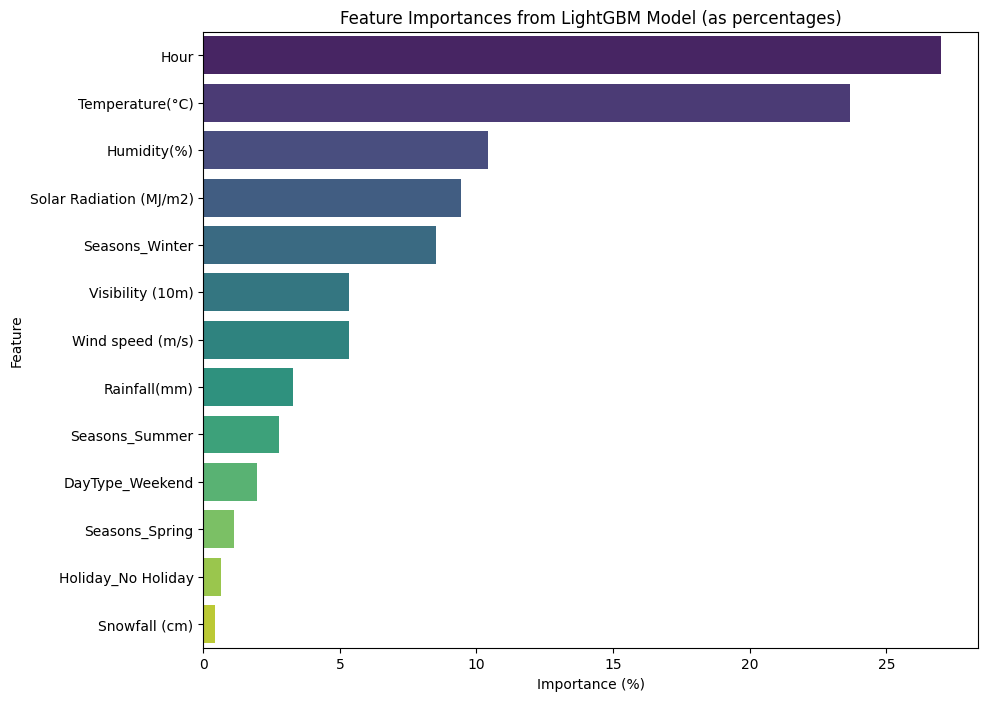

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_regressor' is the best model from GridSearchCV
# Retrieve feature importances
feature_importances = best_regressor.feature_importances_

# Manually define the feature names if you know them
feature_names = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
    'Snowfall (cm)', 'DayType_Weekend', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'
]

# Check if the length of feature_names matches the length of feature_importances
if len(feature_names) != len(feature_importances):
    raise ValueError("The number of feature names does not match the number of feature importances.")

# Convert feature importances to percentages
feature_importances_percent = 100.0 * (feature_importances / feature_importances.sum())

# Create a DataFrame for better visualization
importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_percent
})

# Sort the DataFrame by importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plot feature importances as percentages
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')
plt.title('Feature Importances from LightGBM Model (as percentages)')
plt.xlabel('Importance (%)')  # Update the x-label to reflect percentage
plt.show()